In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import datetime as dat

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### Reading the csv file 

In [2]:
df=pd.read_csv("Walmart_Store_Sales.csv")
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### No Null values were found.

### Data type of "Date" column is changed from object to datetime.

In [5]:
df.Date=pd.to_datetime(df.Date, format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
df["Date"].dt.day_name().value_counts()

Friday    6435
Name: Date, dtype: int64

In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### The "Weekly_Sales" column has weeks from Friday to Friday.

### Checking whether each store has Sales for same number of weeks (Dates)

In [8]:
for i in range(1,46):
    if df[df.Store==i].count()["Store"]!=143:
        print(i)
else:
    print(None)

None


In [9]:
df.Date.value_counts()

2012-03-30    45
2011-03-04    45
2012-10-12    45
2010-07-23    45
2011-04-08    45
              ..
2010-12-31    45
2011-09-16    45
2012-06-01    45
2010-03-12    45
2011-07-15    45
Name: Date, Length: 143, dtype: int64

### Graphically checking correlation between different coulmns

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

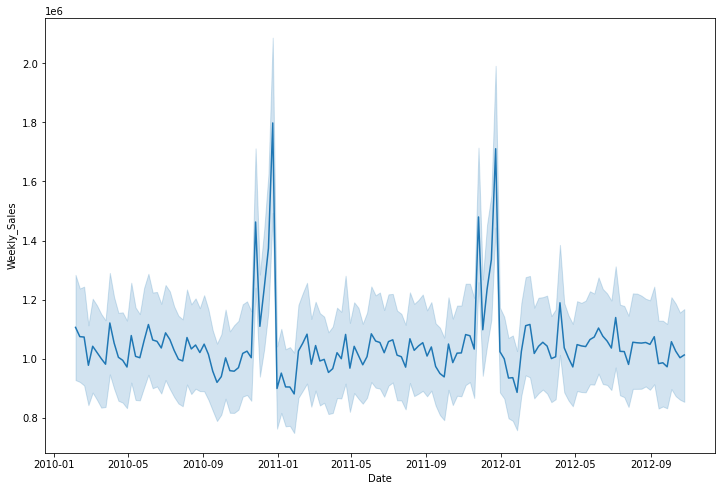

In [10]:
plt.figure(figsize=(12,8))
sns.lineplot(x="Date", y="Weekly_Sales", data=df)

### There is no upward or downward trend seen in the time series.
### Seasonality can be seen in data on a yearly basis.

<Figure size 1440x2160 with 0 Axes>

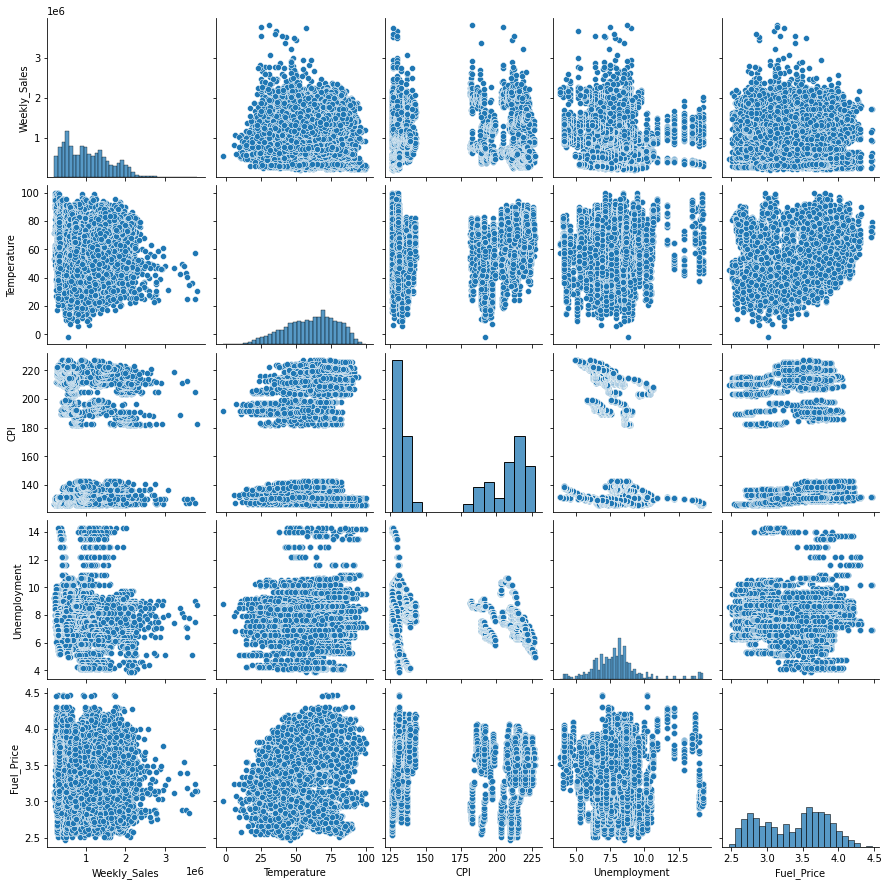

In [11]:
plt.figure(figsize=(20,30))
sns.pairplot(df[["Weekly_Sales","Temperature","CPI","Unemployment","Fuel_Price"]])

### There is no high correlation between different varibales, so we can say that multicollinearity won't be a problem.

<AxesSubplot:>

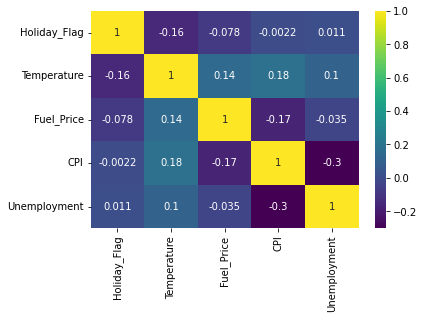

In [12]:
sns.heatmap(df.drop(["Store","Date","Weekly_Sales"],axis=1).corr(), cmap="viridis", annot=True)

In [13]:
df=df.sort_values(by=["Date","Store"]).reset_index().drop("index",axis=1)

In [14]:
data=df.copy()

### Looking for Outliers as we are planning to use Linear Regression, which is not robust to outliers.

<AxesSubplot:xlabel='Unemployment'>

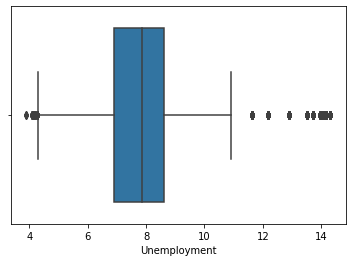

In [15]:
sns.boxplot(x=df["Unemployment"])

<AxesSubplot:xlabel='CPI'>

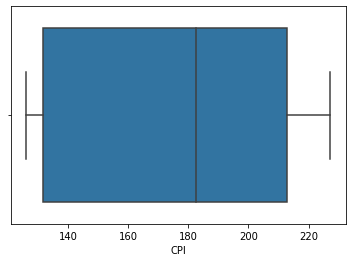

In [16]:
sns.boxplot(x=df["CPI"])

<AxesSubplot:xlabel='Fuel_Price'>

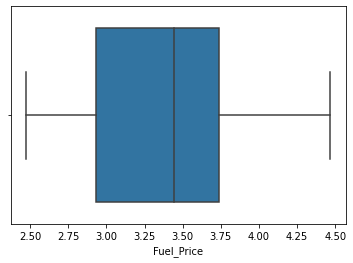

In [17]:
sns.boxplot(x=df["Fuel_Price"])

<AxesSubplot:xlabel='Temperature'>

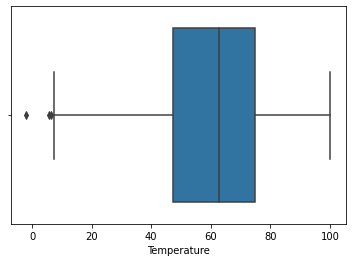

In [18]:
sns.boxplot(x=df["Temperature"])

In [19]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### Using IQR method to detect outliers.

In [20]:
def scale_outliers(col,df):
    arr=np.percentile(df[col],[25,75])
    df.loc[df[col]>(arr[1] + 2*(arr[1]-arr[0])),col] = df.loc[df[col]<(arr[1] + 2*(arr[1]-arr[0])),col].max()
    df.loc[df[col]<(arr[0] - 2*(arr[1]-arr[0])),col] = df.loc[df[col]>(arr[0] - 2*(arr[1]-arr[0])),col].min()

In [21]:
scale_outliers("Unemployment",df)
scale_outliers("Temperature",df)
scale_outliers("CPI",df)
scale_outliers("Fuel_Price",df)

### Here Outliers are scaled down, instead of removing them.

### Extracting "week_num" and "year" feature from "Date" column.

In [22]:
df["week_num"]=df["Date"].dt.isocalendar().week
df["year"]=df["Date"].dt.year
df.drop(["Date"],axis=1,inplace=True)

In [23]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week_num,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,2,2136989.46,0,40.19,2.572,210.752605,8.324,5,2010
2,3,461622.22,0,45.71,2.572,214.424881,7.368,5,2010
3,4,2135143.87,0,43.76,2.598,126.442065,8.623,5,2010
4,5,317173.10,0,39.70,2.572,211.653972,6.566,5,2010


<AxesSubplot:>

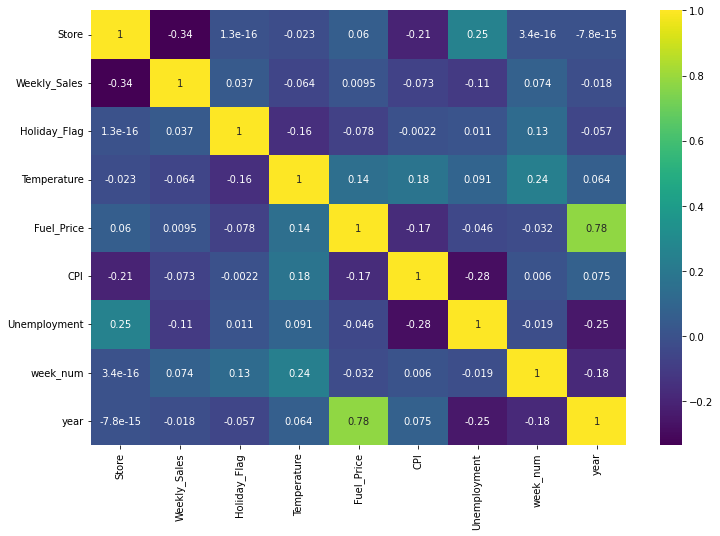

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="viridis", annot=True)

In [25]:
df.loc[df["Holiday_Flag"]==1,"week_num"].unique()

<IntegerArray>
[6, 36, 47, 52]
Length: 4, dtype: UInt32

### Week numbers 6,36,47,52 are the only weeks for which Holiday_Flag==1

### splitting data into train and test data.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Weekly_Sales'],axis=1),df["Weekly_Sales"],test_size=0.2)
X_train.shape, X_test.shape

((5148, 8), (1287, 8))

In [27]:
X_train.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week_num,year
6289,35,0,64.50,3.985,142.851683,8.665,40,2012
5073,34,0,59.29,3.820,130.967097,9.653,13,2012
1189,20,0,74.57,2.784,204.729325,7.527,31,2010
5634,10,0,91.36,3.875,130.756267,7.382,26,2012
2661,7,0,25.69,3.414,192.196484,8.818,12,2011


### Using Column Transformer to preprocess data

In [28]:
num_features=[2,3,4,5,6,7]
cat_features=[0,1]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop="first"), cat_features)
    ])

X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

### Model fitting

In [29]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test, y_pred),r2_score(y_train,lr.predict(X_train))

(0.9217139282559231, 0.9276286544022698)

In [30]:
cross_val_score(lr, preprocessor.fit_transform(df.drop(["Weekly_Sales"],axis=1)), df["Weekly_Sales"], scoring="r2").mean()

0.9192406558398712

In [31]:
## root mean squared error.
np.sqrt(mean_squared_error(df["Weekly_Sales"], lr.predict(preprocessor.fit_transform(df.drop(["Weekly_Sales"],axis=1)))))

153038.39541340116

<AxesSubplot:ylabel='Weekly_Sales'>

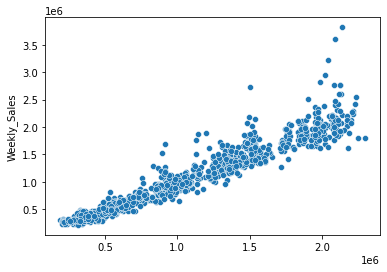

In [32]:
sns.scatterplot(x=y_pred, y=y_test)

### finding coeffecients of different features

In [33]:
feature_names = preprocessor.transformers_[1][1].get_feature_names()

temp1 = ["store"+i[2:] for i in feature_names if i[:2]=="x0"]
temp1.append("Holiday_Flag")
temp2 = ["Temperature", "Fuel Price", "CPI", "Unemployment", "week_num", "year"]
temp2.extend(temp1)

model_coefficients = pd.DataFrame(index = temp2, columns = ['coefficients'], data = lr.coef_)
model_coefficients.sort_values(by="coefficients",key=np.abs, ascending=False)

,coefficients
store_5,-1.285507e+06
store_3,-1.177701e+06
store_36,-1.168881e+06
store_30,-1.117782e+06
store_9,-1.082592e+06
store_37,-1.020353e+06
store_16,-1.019066e+06
store_44,-9.097281e+05
store_7,-9.018466e+05
store_4,8.773271e+05


In [34]:
# We can see that coefficient for Unemployment rate is negative, which means as Unemployment rate increases the Sales of
# Supermarket decreases. The Same pattern is seen for Temperature, as temperature increses, Sales decreases.

## CPI has a positive coefficient, which means according to the data, whenever CPI increases the sales also increases.
## Same pattern is seen with fuel price, as fuel price has slight positive correlation with Sales.
## "year" feature has a slight negative correlation with Sales, we can see in the below graph that Average Sales have been 
#  slightly decreasing year on year.

## "week_num" and "Holiday_Flag" have positive coefficients.

<AxesSubplot:xlabel='year', ylabel='Weekly_Sales'>

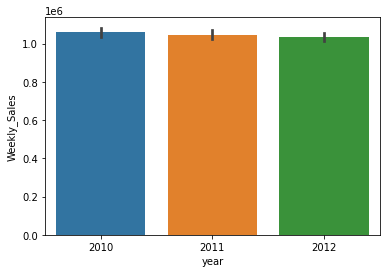

In [35]:
sns.barplot(x="year", y="Weekly_Sales", data=df)

### defining a function to forecast sales

In [36]:
def forecast(Store, Date, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment):
    Date=pd.to_datetime(Date, format="%d-%m-%Y")
    
    week_num=pd.Series(Date).dt.isocalendar().week[0]
    year=pd.Series(Date).dt.year[0]
    
    if week_num in [6,36,47,52]:
        Holiday_Flag=1
    else:
        Holiday_Flag=0
    X=np.array([[Store, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment, week_num, year]])
    X=preprocessor.transform(X)
    
    return lr.predict(X)[0]

In [37]:
# 1, 12-02-2010, 1641957.44, 1, 38.51, 2.548, 211.242170, 8.106
forecast(1,"12-02-2010", 1, 38.51, 2.548, 211.2421, 8.106)

1583711.5359328417

In [38]:
sales=data[data["Store"]==1][48:100]["Weekly_Sales"].values
tempr=data[data["Store"]==1][48:100]["Temperature"].values
fp=data[data["Store"]==1][48:100]["Fuel_Price"].values
CPI=data[data["Store"]==1][48:100]["CPI"].values
unemp=data[data["Store"]==1][48:100]["Unemployment"].values

In [39]:
date=pd.to_datetime("07-01-2011", format="%d-%m-%Y")
arr=[]
lst=[pd.to_datetime("11-02-2011", format="%d-%m-%Y"), 
            pd.to_datetime("25-11-2011", format="%d-%m-%Y"), 
            pd.to_datetime("09-09-2011", format="%d-%m-%Y"), 
            pd.to_datetime("30-12-2011", format="%d-%m-%Y")]


for i in range(52):
    if date in lst:
        arr.append(forecast(1, date, 1, tempr[i], fp[i], CPI[i], unemp[i]))
    else:
        arr.append(forecast(1, date, 0, tempr[i], fp[i], CPI[i], unemp[i]))
    date=date+dat.timedelta(days=7)

Text(0, 0.5, 'Sales')

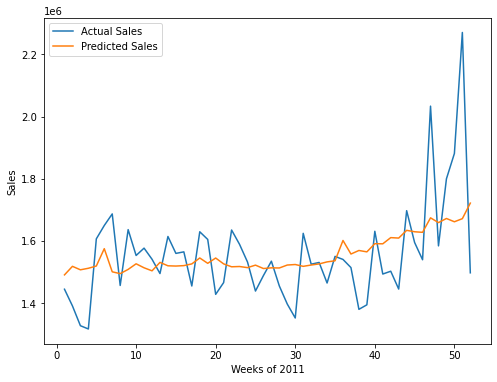

In [40]:
plt.figure(figsize=(8,6))
plt.plot([i for i in range(1,53)],sales, label="Actual Sales")
plt.plot([i for i in range(1,53)],arr, label="Predicted Sales")
plt.legend()
plt.xlabel("Weeks of 2011")
plt.ylabel("Sales")

In [41]:
# Mean absolute error for the above graph
temp=[]
for i in range(len(arr)):
    temp.append(np.abs(arr[i]-sales[i]))
np.mean(temp)

103107.74727455714

## Store having maximum sales

In [42]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,2,2010-02-05,2136989.46,0,40.19,2.572,210.752605,8.324
2,3,2010-02-05,461622.22,0,45.71,2.572,214.424881,7.368
3,4,2010-02-05,2135143.87,0,43.76,2.598,126.442065,8.623
4,5,2010-02-05,317173.10,0,39.70,2.572,211.653972,6.566


In [43]:
temp=data.groupby(["Store"])["Weekly_Sales"].sum().reset_index()
temp.sort_values(by="Weekly_Sales",ascending=False).head()

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

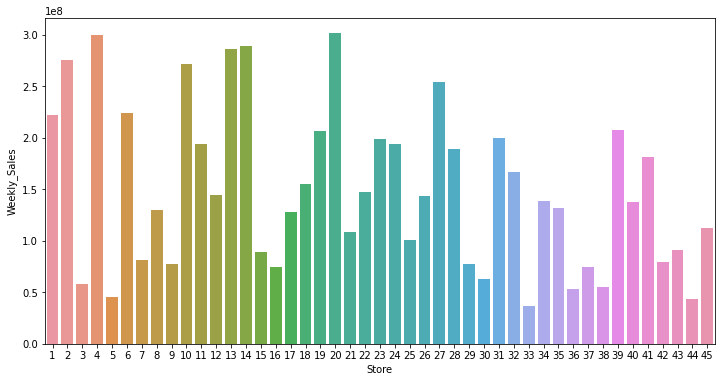

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(data=temp.sort_values(by="Weekly_Sales",ascending=False),y="Weekly_Sales",x="Store")

## Store having maximum standard deviation

In [45]:
a=data.groupby(["Store"])["Weekly_Sales"].std().reset_index().sort_values(by="Weekly_Sales",ascending=False)
a.rename(columns={"Weekly_Sales":"std. deviation of Sales"}, inplace=True)
a.head()

,Store,std. deviation of Sales
13,14,317569.949476
9,10,302262.062504
19,20,275900.562742
3,4,266201.442297
12,13,265506.995776


<AxesSubplot:xlabel='Store', ylabel='std. deviation of Sales'>

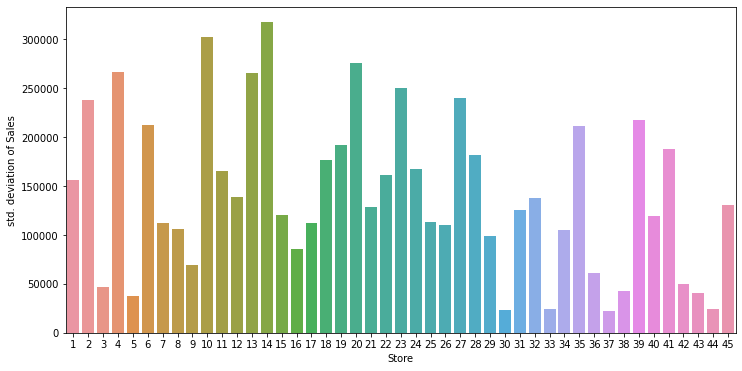

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(data=a,x="Store",y="std. deviation of Sales")

In [47]:
b=data.groupby(["Store"]).agg({"Weekly_Sales":"mean"}).reset_index().sort_values(by="Weekly_Sales",ascending=False)
b.head()

,Store,Weekly_Sales
19,20,2.107677e+06
3,4,2.094713e+06
13,14,2.020978e+06
12,13,2.003620e+06
1,2,1.925751e+06


In [48]:
c=a.join(b.set_index("Store"),on="Store", lsuffix="_std",rsuffix="_mean")
c["std_to_mean_percentage"]=c.iloc[:,1]/c.iloc[:,2]*100
c.head()

,Store,std. deviation of Sales,Weekly_Sales,std_to_mean_percentage
13,14,317569.949476,2.020978e+06,15.713674
9,10,302262.062504,1.899425e+06,15.913349
19,20,275900.562742,2.107677e+06,13.090269
3,4,266201.442297,2.094713e+06,12.708254
12,13,265506.995776,2.003620e+06,13.251363


<AxesSubplot:xlabel='Store', ylabel='std_to_mean_percentage'>

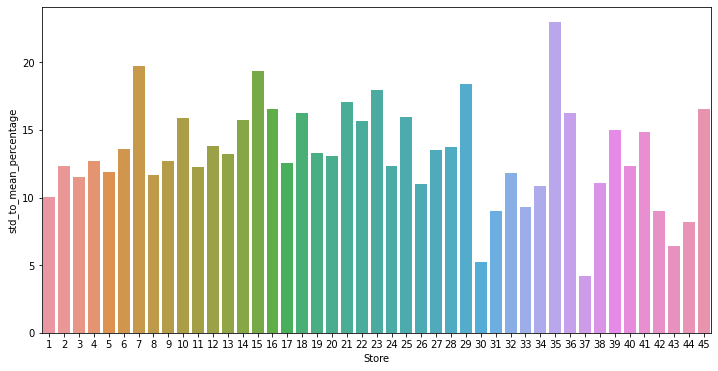

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(data=c,x="Store", y="std_to_mean_percentage")

### Quarterly growth rate in 2012 (Growth from q2 to q3)

In [50]:
q2=df.loc[df["year"]==2012].iloc[13*45:26*45].groupby(["Store"])["Weekly_Sales"].sum().reset_index()
q3=df.loc[df["year"]==2012].iloc[26*45:39*45].groupby(["Store"])["Weekly_Sales"].sum().reset_index()

In [51]:
growth=(q3["Weekly_Sales"]-q2["Weekly_Sales"])*100/(q3["Weekly_Sales"])
q3["quarterly_growth_rate"]=growth

In [52]:
q3.sort_values(by="quarterly_growth_rate", ascending=False).head()

,Store,Weekly_Sales,quarterly_growth_rate
6,7,8262787.39,11.762715
15,16,7121541.64,7.824228
34,35,11322421.12,4.275659
25,26,13675691.91,3.804973
38,39,20715116.23,2.418465


<AxesSubplot:xlabel='Store', ylabel='quarterly_growth_rate'>

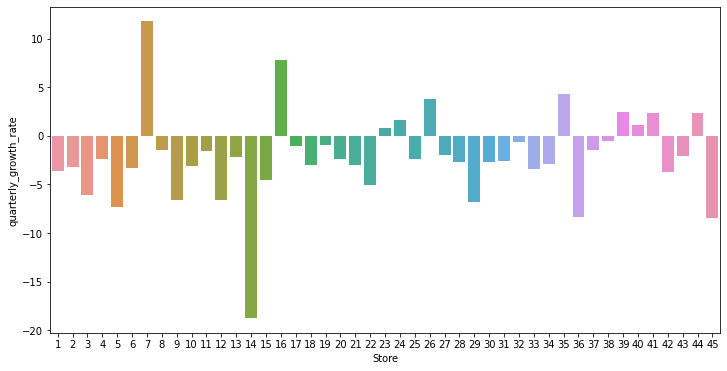

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(data=q3.sort_values(by="quarterly_growth_rate", ascending=False), x="Store",y="quarterly_growth_rate")

In [54]:
## Store number 7 has highest growth rate in Quarter 3 in 2012.

### Analysis of Sales during holiday weeks.

<AxesSubplot:xlabel='week_num', ylabel='Weekly_Sales'>

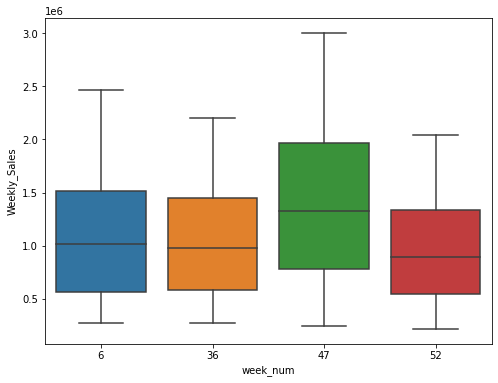

In [55]:
plt.figure(figsize=(8,6))
holiday=df.loc[df["Holiday_Flag"]==1][["week_num","Weekly_Sales"]]
sns.boxplot(x="week_num", y="Weekly_Sales", data=holiday)

In [56]:
## We can see that Sales during "thanksgiving" holiday events in November increases,
## perhaps because people gift different items to each other.

## Further we can see decreased sales during the last few days of year, possible reason might be, 
## till that time most of the people had purchased their requirements and will be busy enjoying Christmas and Upcoming New Year.
## We can see that there is a spike in Sales in week number 51, which shows that people purchase a lot of items for 
## the upcoming Christmas in the last week of year.

### General Trend of Sales in a year

<AxesSubplot:xlabel='week_num', ylabel='Weekly_Sales'>

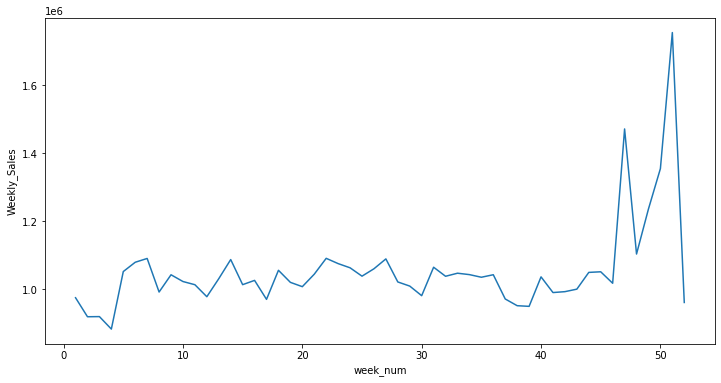

In [57]:
plt.figure(figsize=(12,6))
temp_=df.groupby("week_num")["Weekly_Sales"].mean().reset_index()
sns.lineplot(data=temp_, x="week_num",y="Weekly_Sales")